In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

# Import data from csv

In [7]:
df_train = pd.read_csv("training.csv")
df_test = pd.read_csv("testing.csv", delimiter=";")
df_train

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16620,16621,350000.0,1,2,1,56,3,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,16622,380000.0,2,2,1,60,2,2,2,72557.0,77708.0,79384.0,7000.0,3500.0,0.0,1
16622,16623,340000.0,2,2,1,56,4,3,2,3565.0,3356.0,2758.0,0.0,0.0,22000.0,1
16623,16624,430000.0,1,1,1,61,1,0,0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0,1


# Data exploratory

In [8]:
df_train.shape

(16625, 16)

In [9]:
print(df_train.info())
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16625 non-null  int64  
 1   LIMIT_BAL  16625 non-null  float64
 2   MARRIAGE   16625 non-null  int64  
 3   EDUCATION  16625 non-null  int64  
 4   SEX        16625 non-null  int64  
 5   AGE        16625 non-null  int64  
 6   PAY_1      16625 non-null  int64  
 7   PAY_2      16625 non-null  int64  
 8   PAY_3      16625 non-null  int64  
 9   BILL_AMT1  16625 non-null  float64
 10  BILL_AMT2  16625 non-null  float64
 11  BILL_AMT3  16625 non-null  float64
 12  PAY_AMT1   16625 non-null  float64
 13  PAY_AMT2   16625 non-null  float64
 14  PAY_AMT3   16625 non-null  float64
 15  TARGET     16625 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 2.0 MB
None


ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64

In [10]:
numerikal = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','TARGET']
kategorikal = ['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3','TARGET']

In [11]:
df_train.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

# Data visualizatoin

<Axes: >

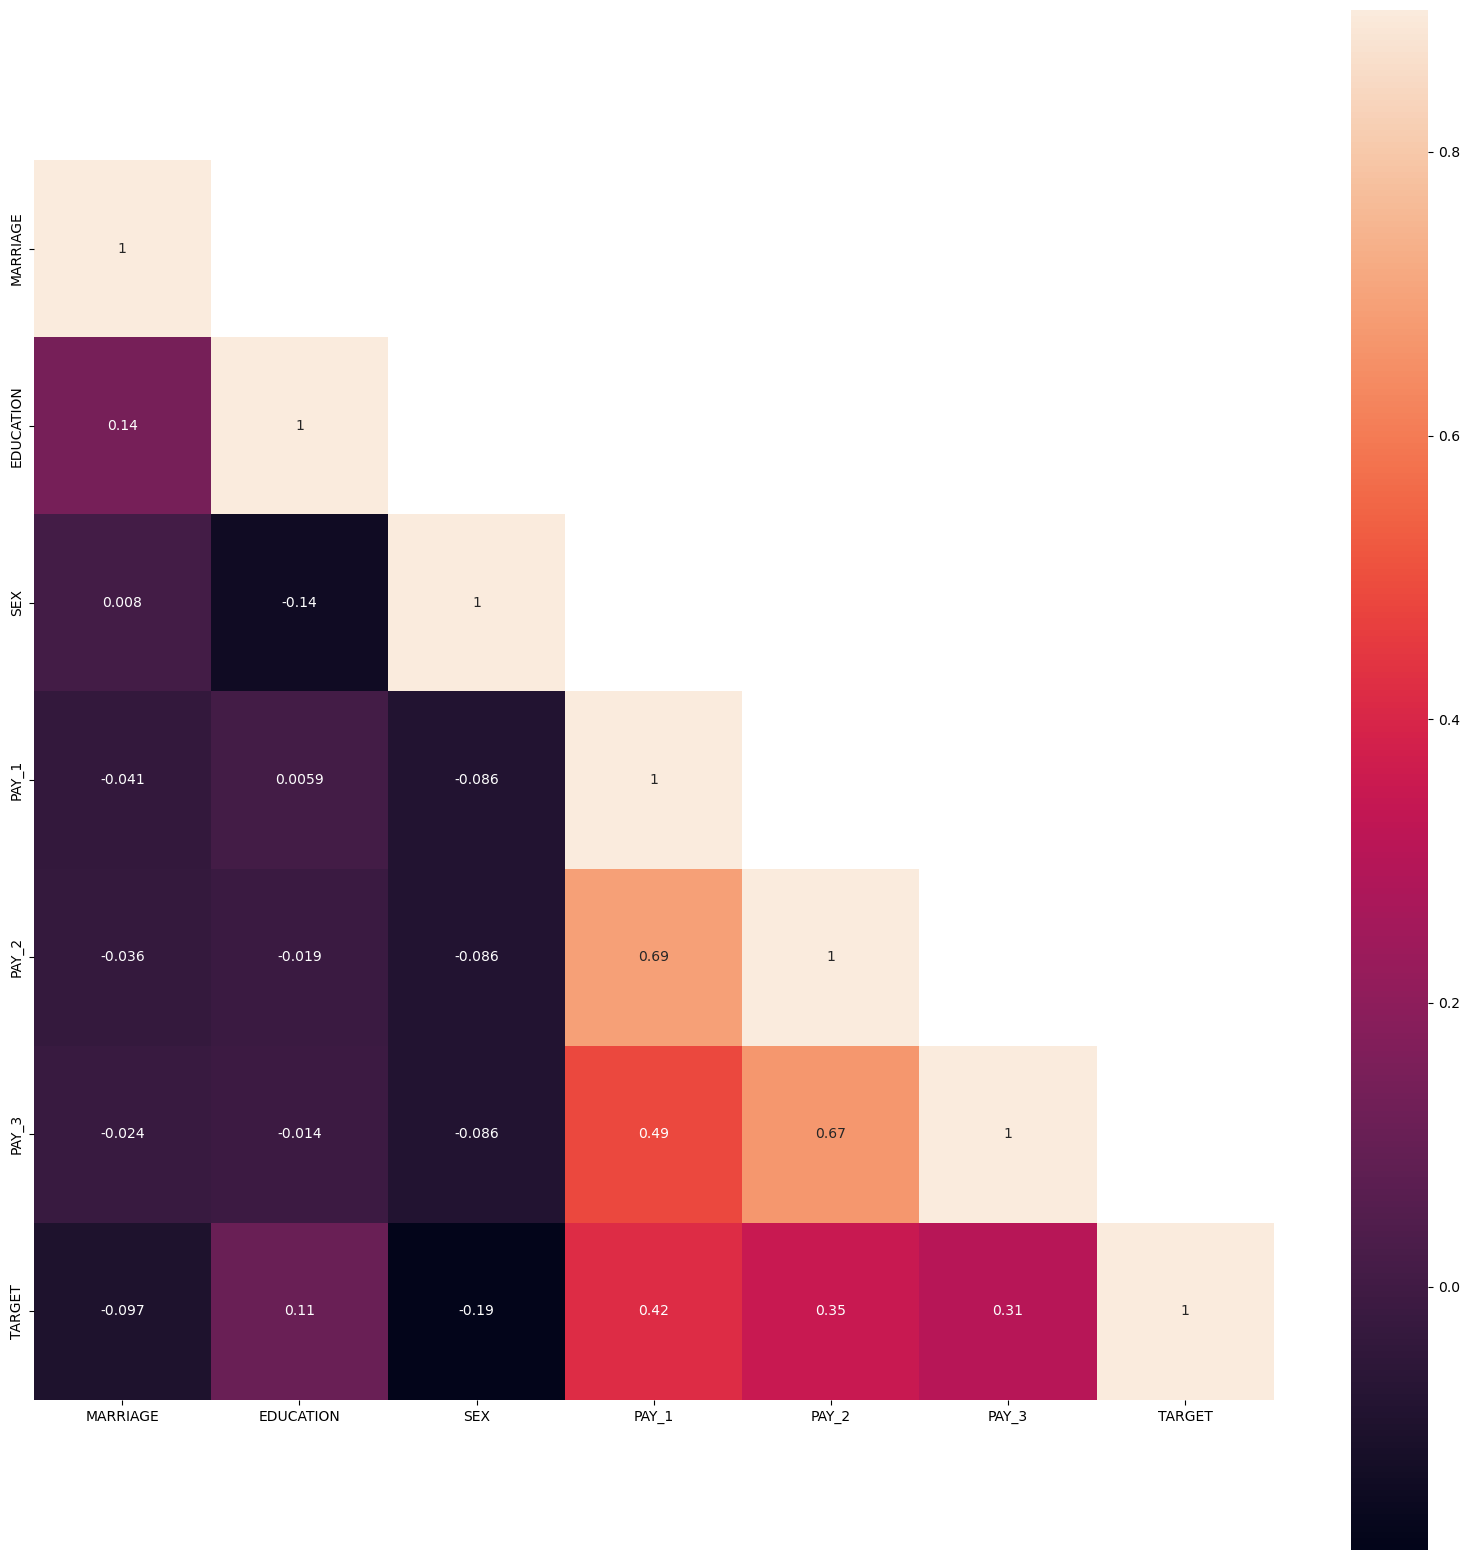

In [12]:
#create correlation with hitmap

#create correlation
#corr = df_train.corr(method = 'pearson')
corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<Axes: >

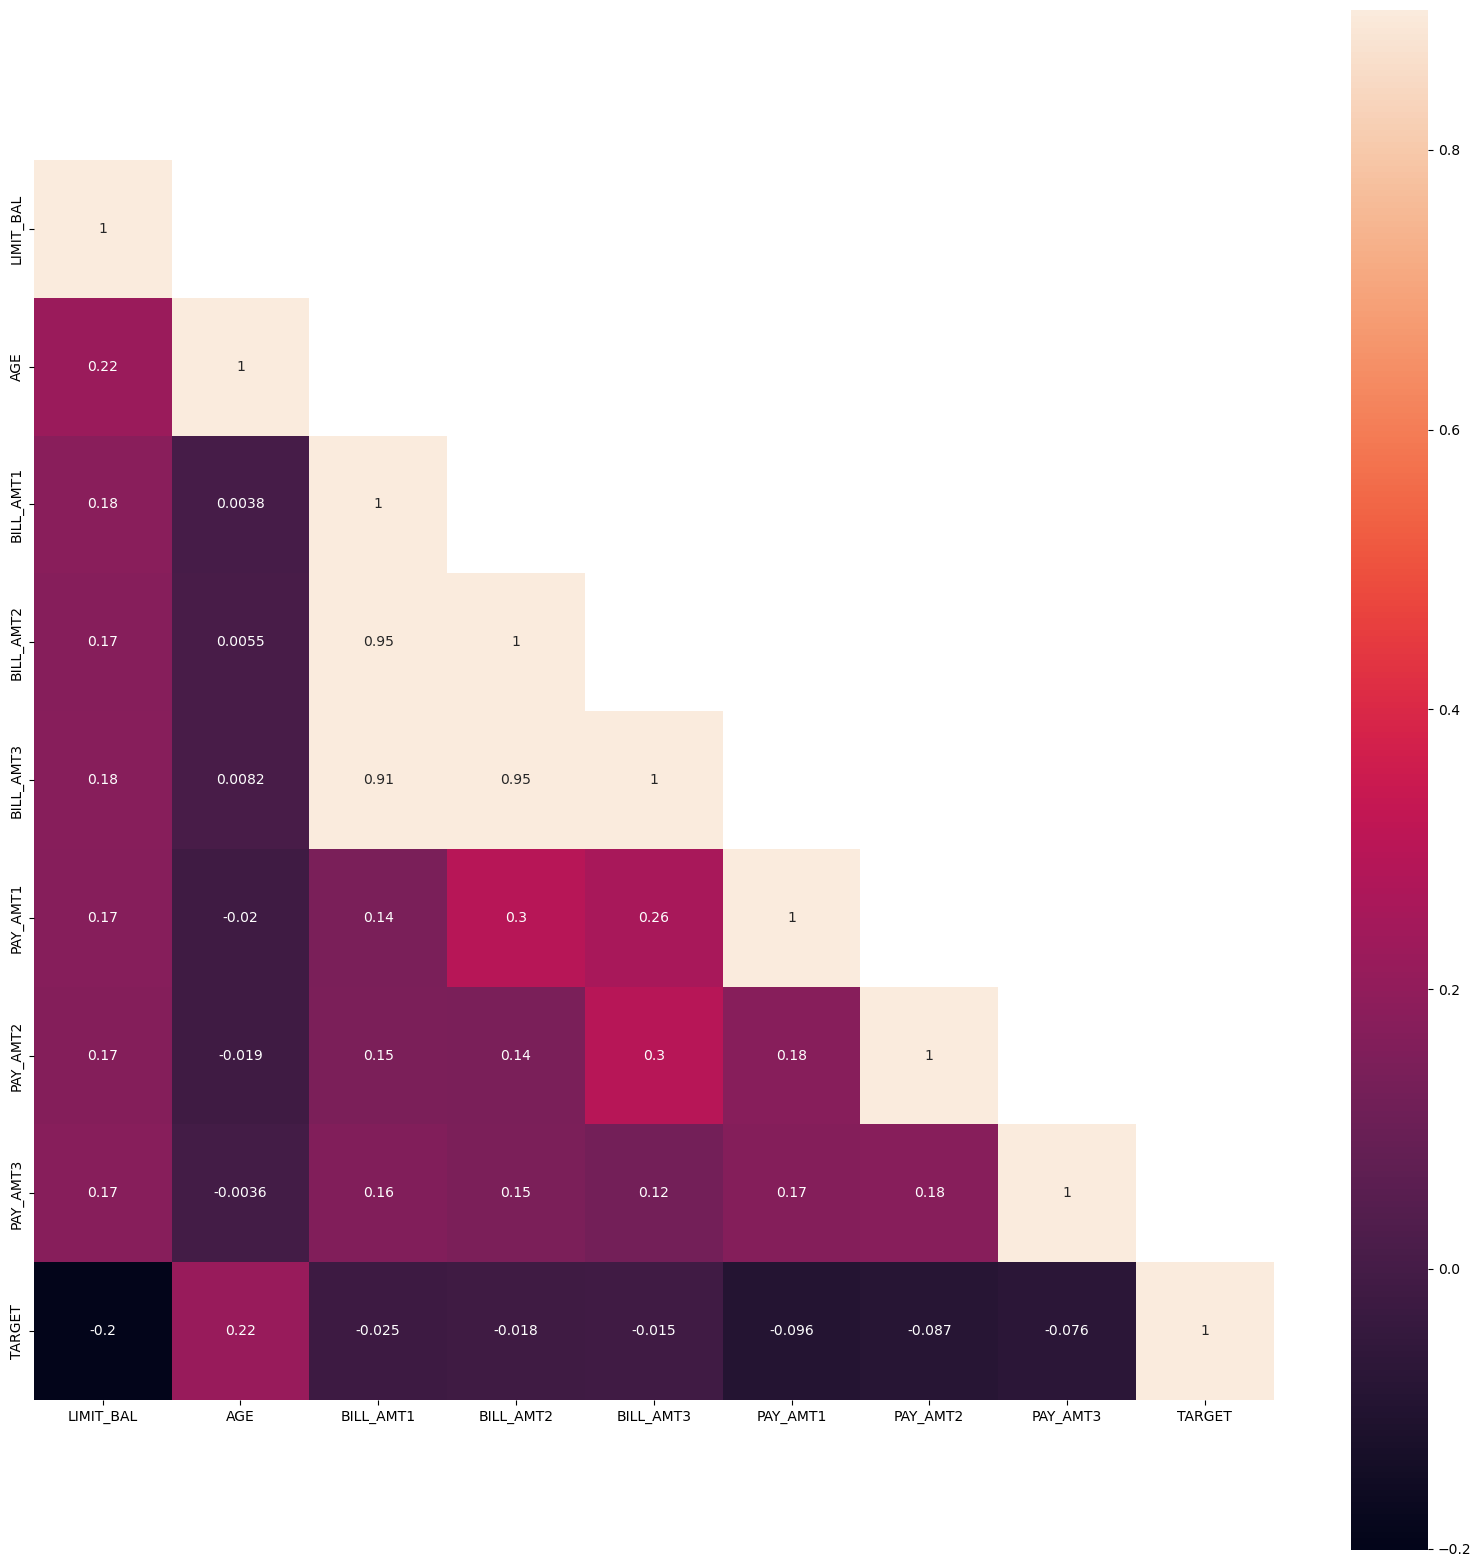

In [13]:
#create correlation with hitmap

#create correlation
corr = df_train[numerikal].corr(method = 'pearson')
#corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<Axes: ylabel='LIMIT_BAL'>

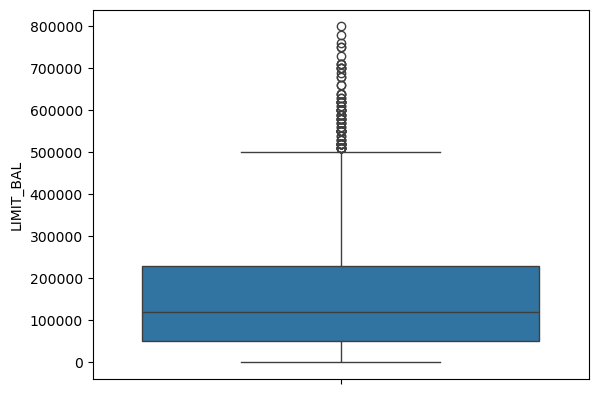

In [14]:
sns.boxplot(df_train["LIMIT_BAL"])

<Axes: ylabel='PAY_1'>

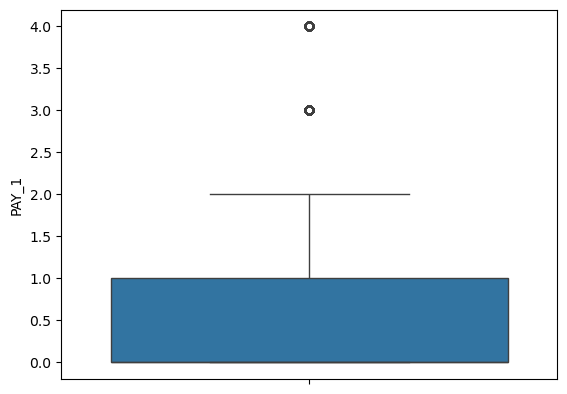

In [15]:
sns.boxplot(df_train["PAY_1"])

<Axes: ylabel='PAY_2'>

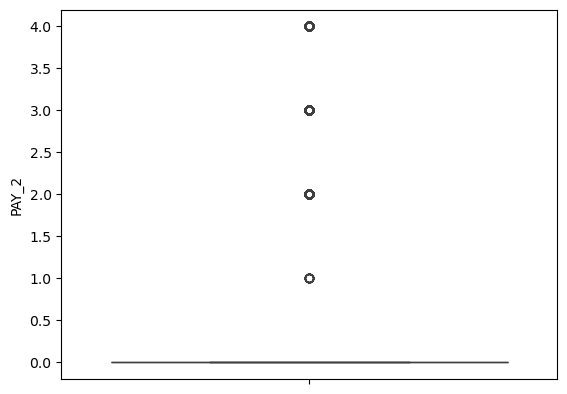

In [16]:
sns.boxplot(df_train["PAY_2"])

<Axes: ylabel='PAY_3'>

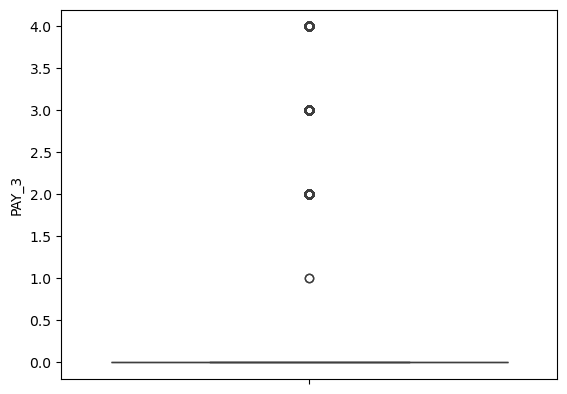

In [17]:
sns.boxplot(df_train["PAY_3"])

<Axes: ylabel='BILL_AMT1'>

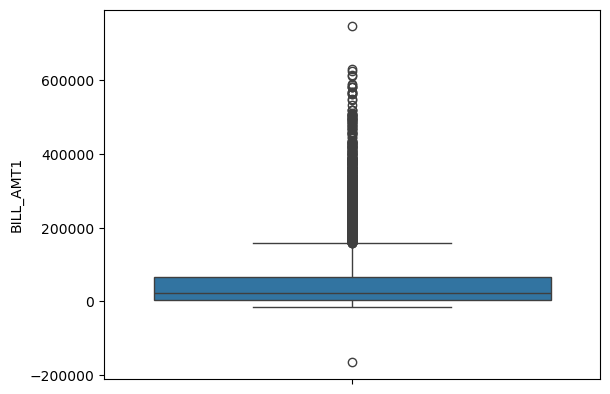

In [18]:
sns.boxplot(df_train["BILL_AMT1"])

<Axes: ylabel='LIMIT_BAL'>

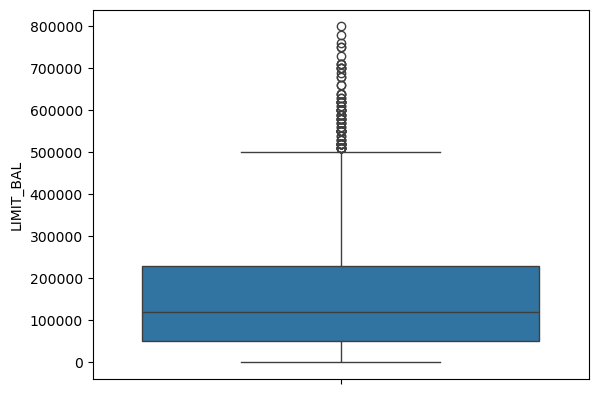

In [19]:
sns.boxplot(df_train['LIMIT_BAL'])

# Drop columns and split the data train

In [20]:
df_cek = df_train[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3","TARGET"]]
df_cek_test = df_test[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3"]]

In [21]:
y_trains = df_cek['TARGET']
X_trains = df_cek.drop(columns='TARGET')

In [22]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.33, random_state=42)

# Creating models with data train

## 1. k-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3318
           1       0.80      0.79      0.80      2169

    accuracy                           0.84      5487
   macro avg       0.83      0.83      0.83      5487
weighted avg       0.84      0.84      0.84      5487

accuracy score:  0.839803171131766
auc score:  0.8305005931850828


## 2. SVM

In [25]:
from sklearn import svm

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train) 

SVC(gamma=0.001)

In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3318
           1       0.81      0.74      0.78      2169

    accuracy                           0.83      5487
   macro avg       0.82      0.81      0.82      5487
weighted avg       0.83      0.83      0.83      5487

accuracy score:  0.82941498086386
auc score:  0.8147265804443177


## 3. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3318
           1       0.79      0.74      0.76      2169

    accuracy                           0.82      5487
   macro avg       0.81      0.81      0.81      5487
weighted avg       0.82      0.82      0.82      5487

accuracy score:  0.8188445416438855
auc score:  0.8059065477128401


## 4. Multinomioal Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      3318
           1       0.52      0.72      0.60      2169

    accuracy                           0.63      5487
   macro avg       0.64      0.64      0.63      5487
weighted avg       0.66      0.63      0.63      5487

accuracy score:  0.6273008930198651
auc score:  0.6433769614083706


## 5. Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3318
           1       0.69      0.57      0.62      2169

    accuracy                           0.73      5487
   macro avg       0.72      0.70      0.70      5487
weighted avg       0.72      0.73      0.72      5487

accuracy score:  0.7269910698013486
auc score:  0.6989839985926966


## 6. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [34]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3318
           1       0.80      0.79      0.79      2169

    accuracy                           0.84      5487
   macro avg       0.83      0.83      0.83      5487
weighted avg       0.84      0.84      0.84      5487

accuracy score:  0.8381629305631493
auc score:  0.8293040100645541


## 7. Extra Trees

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=10, random_state=0)

In [36]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3318
           1       0.79      0.76      0.78      2169

    accuracy                           0.83      5487
   macro avg       0.82      0.81      0.82      5487
weighted avg       0.83      0.83      0.83      5487

accuracy score:  0.8264989976307636
auc score:  0.8145506675103817


Dikarenakan hasil paling bagus dari compare model adalah random forest dengan auc 0.84, maka model tersebut akan dilakukan tuning paramter pada parameter max_depth

In [37]:
for i in [10, 15, 20, 25]:
    clf = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('accuracy score dengan n_estimator = ',i,' : ',accuracy_score(y_test,y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print('auc scoredengan n_estimator = ',i,' : ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3318
           1       0.81      0.81      0.81      2169

    accuracy                           0.85      5487
   macro avg       0.84      0.84      0.84      5487
weighted avg       0.85      0.85      0.85      5487

accuracy score dengan n_estimator =  10  :  0.8481866229269182
auc scoredengan n_estimator =  10  :  0.8413440415121176
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3318
           1       0.82      0.81      0.81      2169

    accuracy                           0.85      5487
   macro avg       0.85      0.84      0.84      5487
weighted avg       0.85      0.85      0.85      5487

accuracy score dengan n_estimator =  15  :  0.8514671040641516
auc scoredengan n_estimator =  15  :  0.8436573799644338
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      33

By tuning the n_estimator, we get n_estimator 25 with auc 0.84.

# Classification results

From the results of the evaluation test, it was concluded that the Random Forest method had the highest AUC score, which was 0.82. Therefore, modeling was carried out to predict the test data.

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=25, random_state=0)
clf.fit(X_trains, y_trains)

RandomForestClassifier(min_samples_split=25, n_estimators=25, random_state=0)

In [39]:
y_pred = clf.predict(df_cek_test)

In [40]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
df_test['TARGET'] = pd.Series(y_pred)

In [42]:
df_test['TARGET'].value_counts()

TARGET
0    10305
1     6320
Name: count, dtype: int64

In [43]:
df_test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [44]:
df_test.to_csv("Hasil Testing Credit Scoring.csv")